In [1]:
import pandas as pd

In [2]:
#UPLOAD THE DATASET

data = pd.read_csv('/home/johary/Python_ML/project02/StarCluster/c_0000.csv')
df = pd.DataFrame(data)
df.head()

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5


## Information of dataset 
### x, y, z : position in 3D of the stelar object

### vx, vy, vz : velocity in 3D of the stelar object
### m : mass of the stelar object

In [3]:
df.shape

(64000, 8)

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

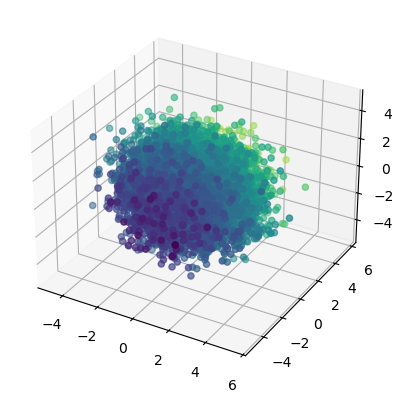

In [5]:
#show the repartition of the position object in 3D 

ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z, c=df.y)

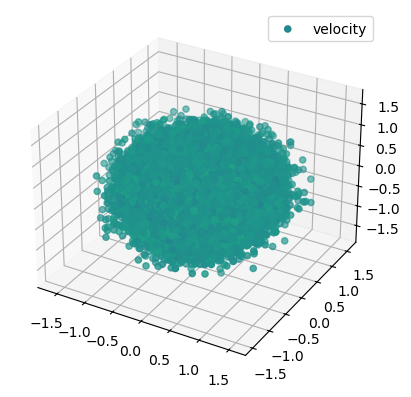

In [6]:
#show the repartition of the velocity object in 3D 
ax = plt.axes(projection='3d')
ax.scatter(df.vx, df.vy, df.vz, label ='velocity', c = df.z)
plt.legend()

<Axes: ylabel='count'>

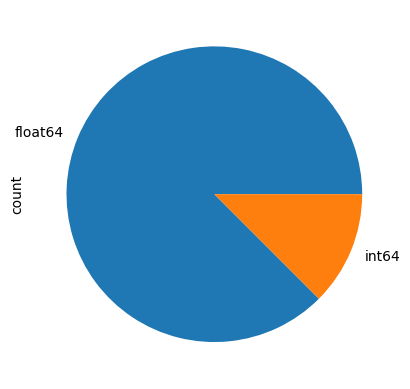

In [7]:
import matplotlib.pyplot as plt
df.dtypes.value_counts().plot.pie() #repartition of value within this dataset

<Axes: >

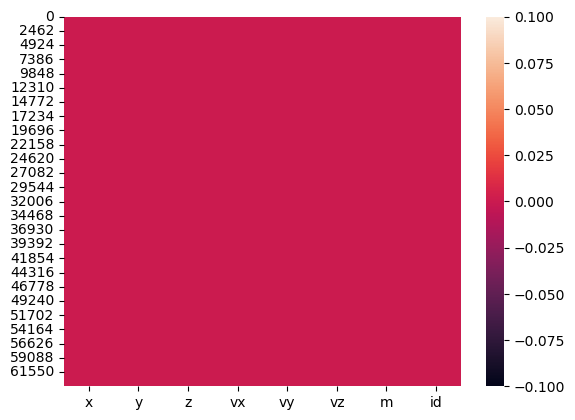

In [8]:
import seaborn as sns
sns.heatmap(df.isna()) #show the NAN value within the dataset

## ***preprocessing***

In [9]:
from sklearn.preprocessing import MinMax

In [10]:
#PREPROCESSING
X_minmax = StandardScaler().fit_transform(df)

## ***create of model***

In [11]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'list1')

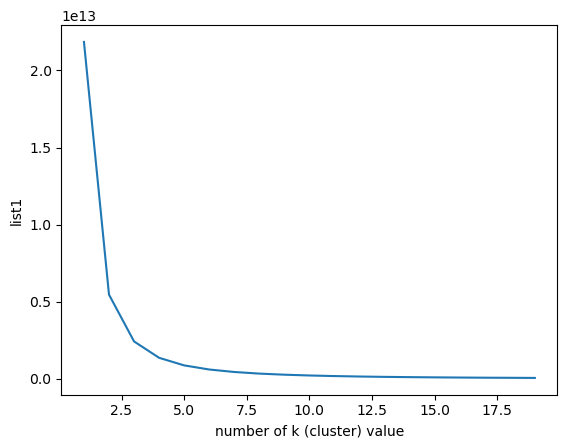

In [12]:
#loking for the nomber of closter
list1 = []

for k in range(1,20):
    mod = KMeans(n_clusters = k)
    mod.fit(df)
    list1.append(mod.inertia_) # inertia means that find to value of list1
    
plt.plot(range(1,20),list1)
plt.xlabel("number of k (cluster) value")
plt.ylabel("list1")

In [13]:
from kneed import KneeLocator

knee = KneeLocator(range(1,20), list1, curve = 'convex', direction = 'decreasing')
print(f'Cluster points: {knee.elbow}')

Cluster points: 3


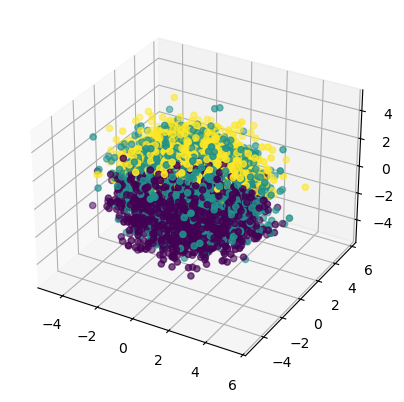

In [14]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3) #model of clustering
clusters = model.fit_predict(X_minmax )

ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z,c = clusters)
